In [41]:
from google.colab import drive
drive.mount ('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


타이타닉 호의 침몰은 역사상 악명 높은 난파 사고였습니다. 1912년 4월 15일 항해 중간 쯤 타이타닉호는 빙하에 부딪혀 가라앉았고, 이로 인해 2224명 중 1502명의 승객과 선원이 사망했습니다. 이러한 이유로 이름이 DieTanic입니다. 이는 세계적으로 아무도 잊을 수 없는 재앙입니다.  
  
75억이 들었습니다. 타이타닉호를 짖는데. 그리고 충돌로 인해서 바다 밑으로 가라앉았습니다. 타이타닉 데이터셋은 초보자에게 매우 좋습니다. 데이터 사이언스 여정을 시작하고 캐글 경진대회에 참여하려고 하는 초보자 들에게.  
  
이 노트북의 목적은 아이디어를 주는 것 입니다. 예측 모델링 문제의 흐름이 어떻게 되는지에 대한. 어떻게 피처를 점검하고, 새로운 피처를 추가하는지 그리고 일부의 기계 학습 개념을. 저는 노트북을 기초적으로 유지하려고 노력해 왔습니다. 초보자들도 매 흐름을 이해할 수 있도록 

# Contents of the Notebook:  
  
## Part1: Exploratory Data Analysis(EDA):
1) Analysis of the features.  
  
2) Finding any relations or trends considering multiple features.
  
## Part2: Feature Engineering and Data Cleaning:
1) Adding any few features.  
  
2) Removing redundant features.  
  
3) Converting features into suitable from for modeling.  
  
## Part3: Predictive Modeling  
1) Running basic Algorithms.  
  
2) Cross Validation.  
  
3) Ensembling.  
  
4) Important Features Extraction.

## Part1: Exploratory Data Analysis(EDA)

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore') # 버전이 올라갈 때 변경된 사항을 알려 주는 경고 메세지를 숨긴다.
%matplotlib inline

In [43]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle study/Titanic/train.csv')

In [44]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [46]:
data.isnull().sum() # 총 null values를 검사

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin 그리고 Embarked 는 null values가 있습니다. 이들을 바로 잡겠습니다.

얼마나 살아 남았는지 체크

In [47]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

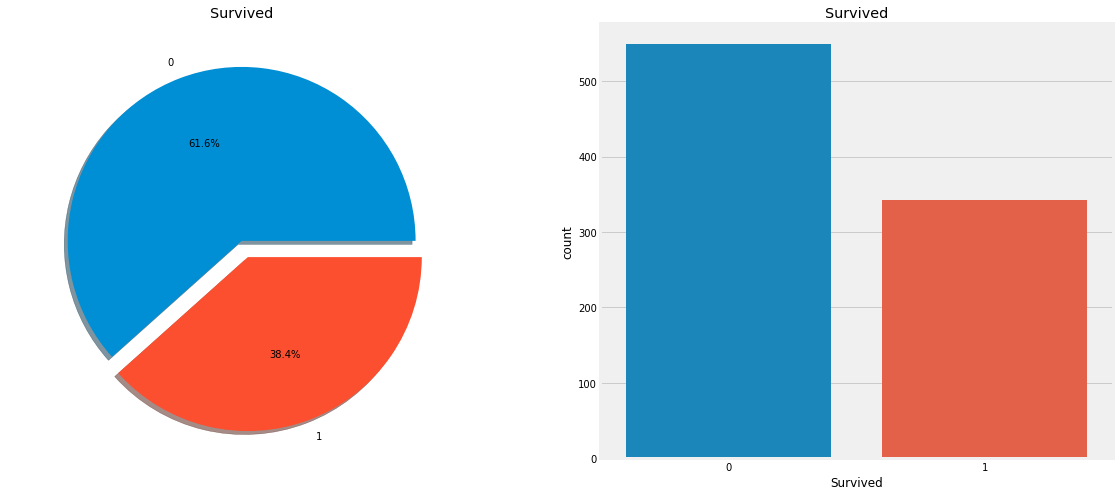

In [48]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel(' ')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

해당 사고에서 많지 않은 승객이 살아 남았다는 것은 명백합니다.  
트레이닝 셋에서 891 명의 승객 중 오직 250명 정도 많이 살아남았습니다. 이는 전체 트레이닝 셋의 충돌 사고에서 38.4%에 해당합니다. 우리는 데이터에서 더 나은 인사이트를 얻기 위해 더 파보아야 합니다. 그리고 봐야 합니다. 승객들이 살아 남았거나 그렇지 못한 카테고리를.  
  
우리는 생존률을 확인할 것입니다. 데이터셋의 다른 피처들을 활용해서. 이 피처들은 성별, 탑승 항구, 나이 등이 있습니다.  
  
먼저 피처들의 타입들에 대해서 이해해 보겠습니다.

### Types Of Features
**Categorical Feature:**  
범주형 변수는 두개나 이 이상의 범주를 갖습니다. 또한 여기에 속한 각각의 값은 분류될 수 있습니다. 예를 들어 성별은 두 카테고리를 갖는 범주형 변수입니다. (남자, 여자) 우리는 이러한 변수에 대해 순서를 부여할 수 없습니다. 이들은 또한 명목 변수로 알려져 있기도 합니다.  
  
**Categorical Features in the dataset: Sex, Embarked**

**Ordinal Features:**  
순서형 변수들은 범주형 변수와 비슷하지만 다른 점은 상대적인 순서를 부여하거나 값들을 정렬할 수 있다는 것입니다. 예를 들어 키와 같은 피처에 대해 큰, 중간, 작은 등이 있으며 키는 순서형 변수입니다. 우리는 상대적인 값들을 정렬할 수 있습니다.  
**Ordinal Features in the dataset: PClass**

**Continous Feature:**  
피처가 연속적이라고 한다면 값을 취할 수 있습니다. 어느 두 지점 혹은 최소, 최대 값을 피처 열에 대해서.  
**Continous Features in the dataset: Age**

### Analysing The Features
### Sex -> Categorical Feature

In [49]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [50]:
# Sex를 인덱스로 해서 Survived로 dataframe을 집게한다.
data.groupby(['Sex', 'Survived']).count()

PassengerId  Pclass  Name  Age  ...  Ticket  Fare  Cabin  Embarked
Sex    Survived                                  ...                               
female 0                  81      81    81   64  ...      81    81      6        81
       1                 233     233   233  197  ...     233   233     91       231
male   0                 468     468   468  360  ...     468   468     62       468
       1                 109     109   109   93  ...     109   109     45       109

[4 rows x 10 columns]

In [51]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [52]:
data[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


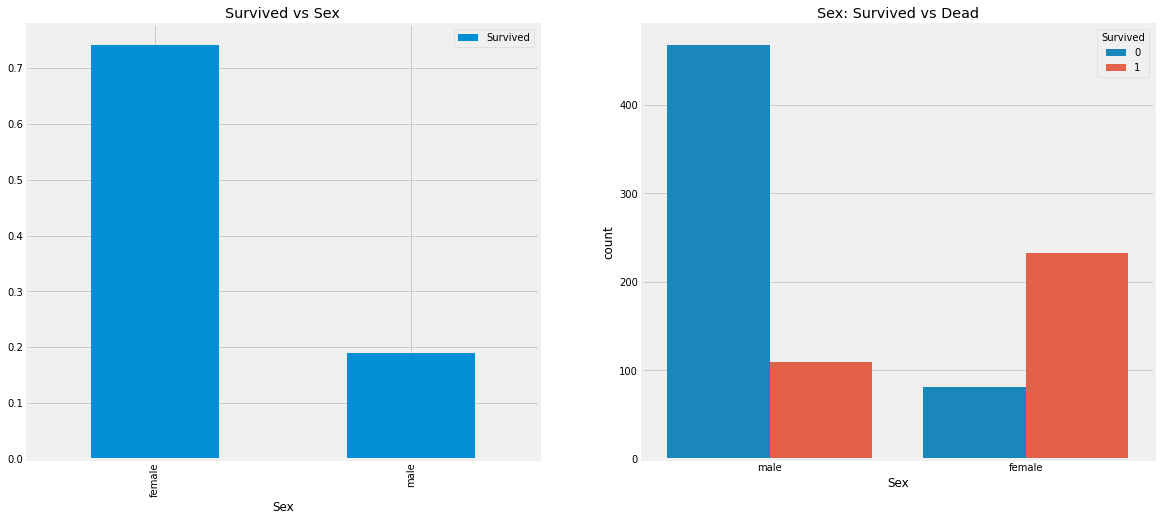

In [53]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

흥미로워 보입니다. 배에서 남자들의 숫자는 여자의 수 보다 많습니다. 하지만 살아 남은 여자의 수는 남자 수에 비해서 거의 두 배입니다. **배의 여자 생존률은 75%에 달하는 반면 남자는 18-19%입니다.**  
이는 모델링에 있어서 매우 중요한 피처인듯 합니다. 하지만 이것이 최선일까요? 다른 피처를 확인해 보겠습니다.

### Pclass -> Ordinal Feature

In [54]:
pd.crosstab(data.Pclass, data.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [55]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


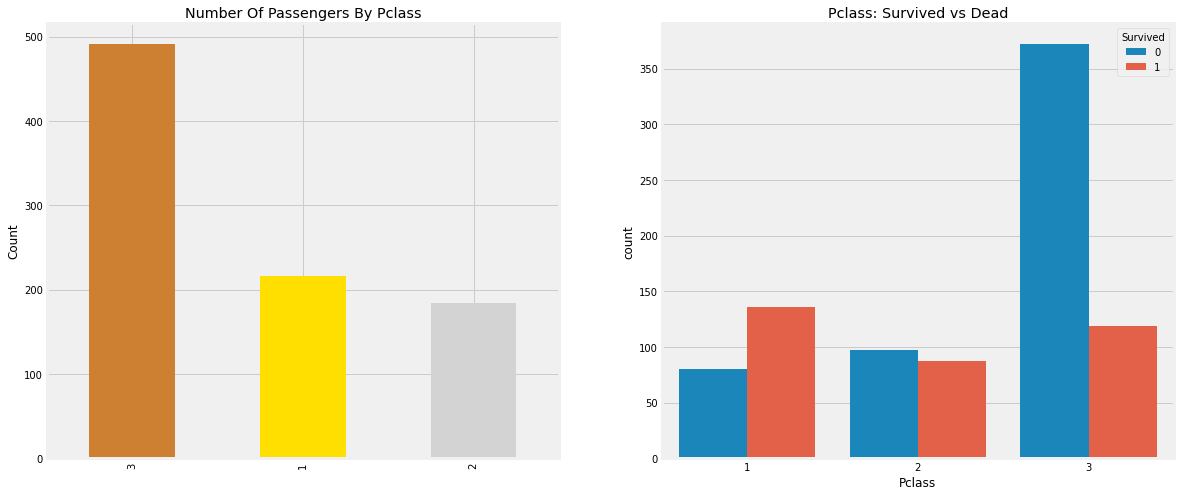

In [56]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

사람들은 "돈으로 모든 것을 살 수 없다"고 말합니다. 하지만 우리는 분명하게 볼 수 있습니다. Pclass1의 승객은 구조에 있어 매우 높은 우선 순위를 얻었습니다. 심지어 Pclass 3의 승객의 수가 비교적으로 매우 많았지만 살아 남은 수는 매우 적었습니다. **25%** 근처 정도 될 것입니다.  
Pclass 1의 경우 산 사람은 **63%** 정도 되는 반면 Pclass 2는 **48%** 정도입니다. 따라서 돈과 지위는 중요합니다.  
조금 더 파고 들어가 확인해 봅시다. 다른 흥미로운 관측에 대해. **Sex, Pclass**에 대한 생존률을 같이 확인해 봅시다.

In [57]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

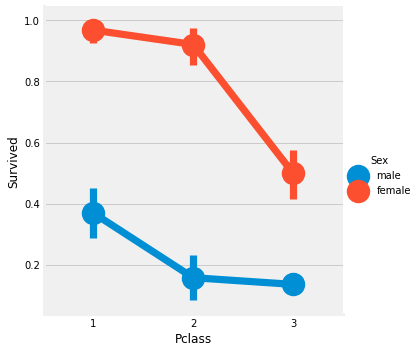

In [58]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

이 경우에 대해서는 **FactorPlot**을 썼습니다. 이들은 categorical values에 대한 구분을 쉽게 만들어 줍니다.  
CrossTab과 FactorPlot을 보면, 우리는 쉽게 추론할 수 있습니다. Pclass1의 여자 생존률은 **95-96%** 정도이며 Pclass1의 여성들은 오직 94명 중 3명이 죽었습니다.  
이는 명확합니다. Pclass엥 상관 없이 여성은 구조에 있어 첫 번째 우선순위를 얻습니다. 심지어 Pclass1의 남성은 매우 낮은 생존률을 기록했습니다.  
Pclass 또한 매우 중요한 피처로 도입니다. 다른 피처들 또한 분석해 봅시다.

### Age -> Continous Feature

In [59]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


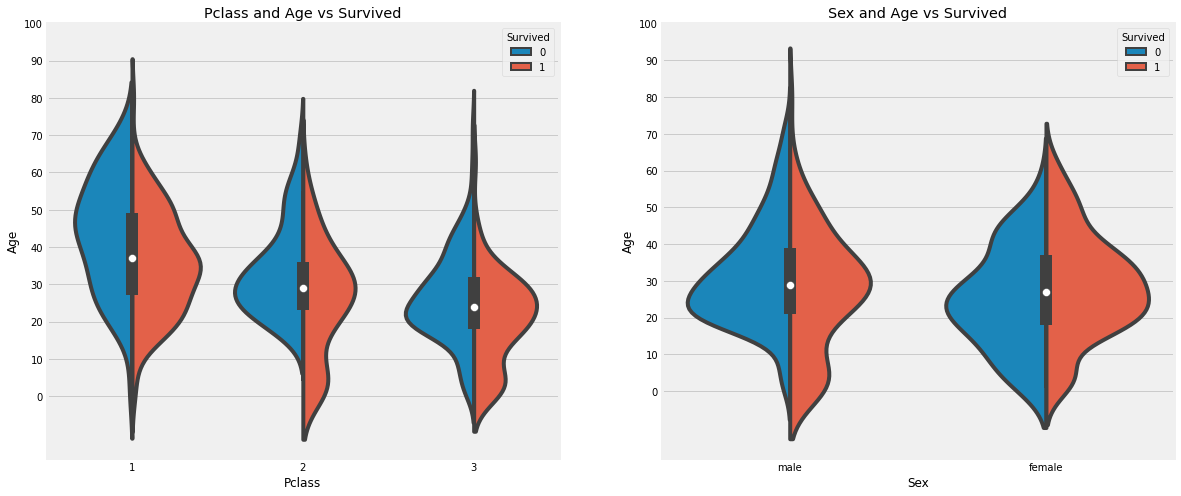

In [60]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

**논평:**  
1) 아이들의 수는 Pclass에 따라 증가합니다. 그리고 10살 미만 승객의 생존률(즉, 아이들)은 Pclass에 상관 없이 좋은 것 같습니다.  
2) Pclass1 승객의 20-50살의 생존 기회는 높으며 심지어 여성들보다 좋습니다.  
3) 남성에 있어, 생존 기회는 나이가 증가할 수록 감소합니다.

이전에 봤는이 Age feature은 177개의 null 값을 가집니다. 이 NaN 값을 대체하기 위해 우리는 데이터 셋에서 나이의 평균 값을 할당할 것입니다.  
하지만 문제는 다양한 나이대를 가진 많은 사람들이 있다는 것입니다. 우리는 4살의 아이에게 평균 값인 29살을 할당할 수 없습니다. 승객의 연령 밴드가 어떻게 되는지에 대해서 알 방법이 없을까요?  
**Name** Feature를 확인할 수 있습니다. 이로써 Mr or Mrs와 같은 이름이 가진 인사말을 확인할 수 있습니다. 그러므로 우리는 Mr와 Mrs의 상대적 그룹에 대한 평균 값을 할당할 수 있습니다.

In [61]:
data['Initial'] = 0
for i in data:
  data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # extract the Salutation 영어 대문자, 소문자 + dot 추출


Salutation에는 영어 뿐만 아니라 . (dot)까지 포함돼 있다. 따라서 정규식을 이용해 해당 문자가 들어 있는 모든 부분을 추출한다.

In [62]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r') # 성별에 따른 Initial 확인

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mille, Mme과 같이 잘못 적힌 이니셜이 있습니다. 이는 Miss에 대응돼야 합니다. 이러한 경우를 Miss처럼 올바르게 대응시켜 주겠습니다.

In [65]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [67]:
data.groupby('Initial')['Age'].mean() # Initial에 따른 평균 나이대 확인

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

**Filling NaN Ages**

In [68]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [69]:
data.Age.isnull().any()

False

Age Feature에 대한 null data가 모두 제거되었습니다.

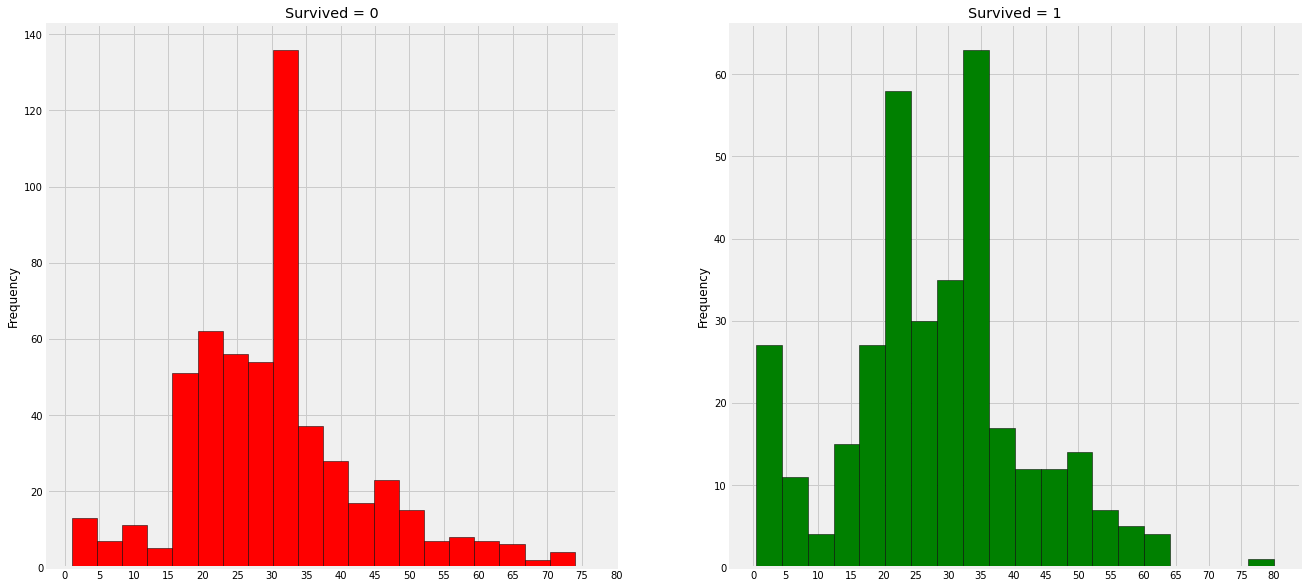

In [70]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

**논평:**  
1) Toddlers (나이 5세 미만)은 매우 많은 수가 생존했습니다. (여성, 아이 우대 정책에 의해).  
2) 나이가 가장 많은 승객은 생존했습니다. (80살)  
3) 가장 많은 수가 사망한 나이대는 30-40입니다.

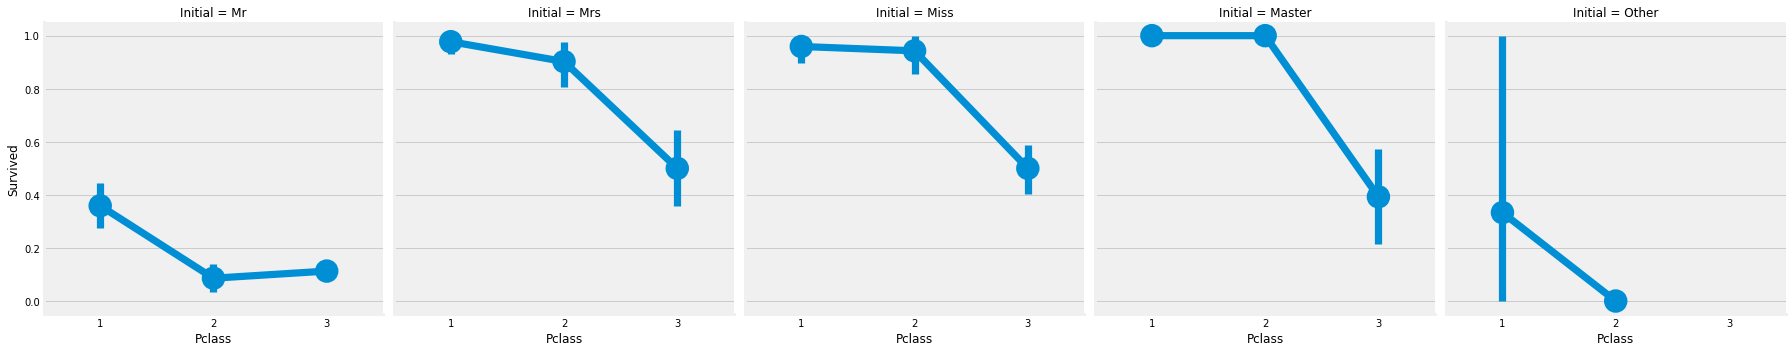

In [71]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

class에 상관 없이 여성, 아이 우대 정책은 유효합니다.

### Embarked -> Categorical Value

In [73]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

**Chances for Survival by Port Of Embarkation**

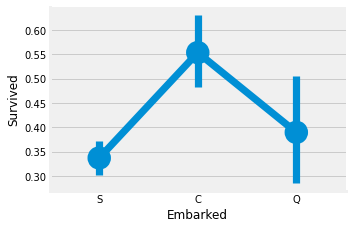

In [76]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

Port C의 생존 기회는 0.55 정도로 가장 높은 반면 S는 가장 낮았습니다.

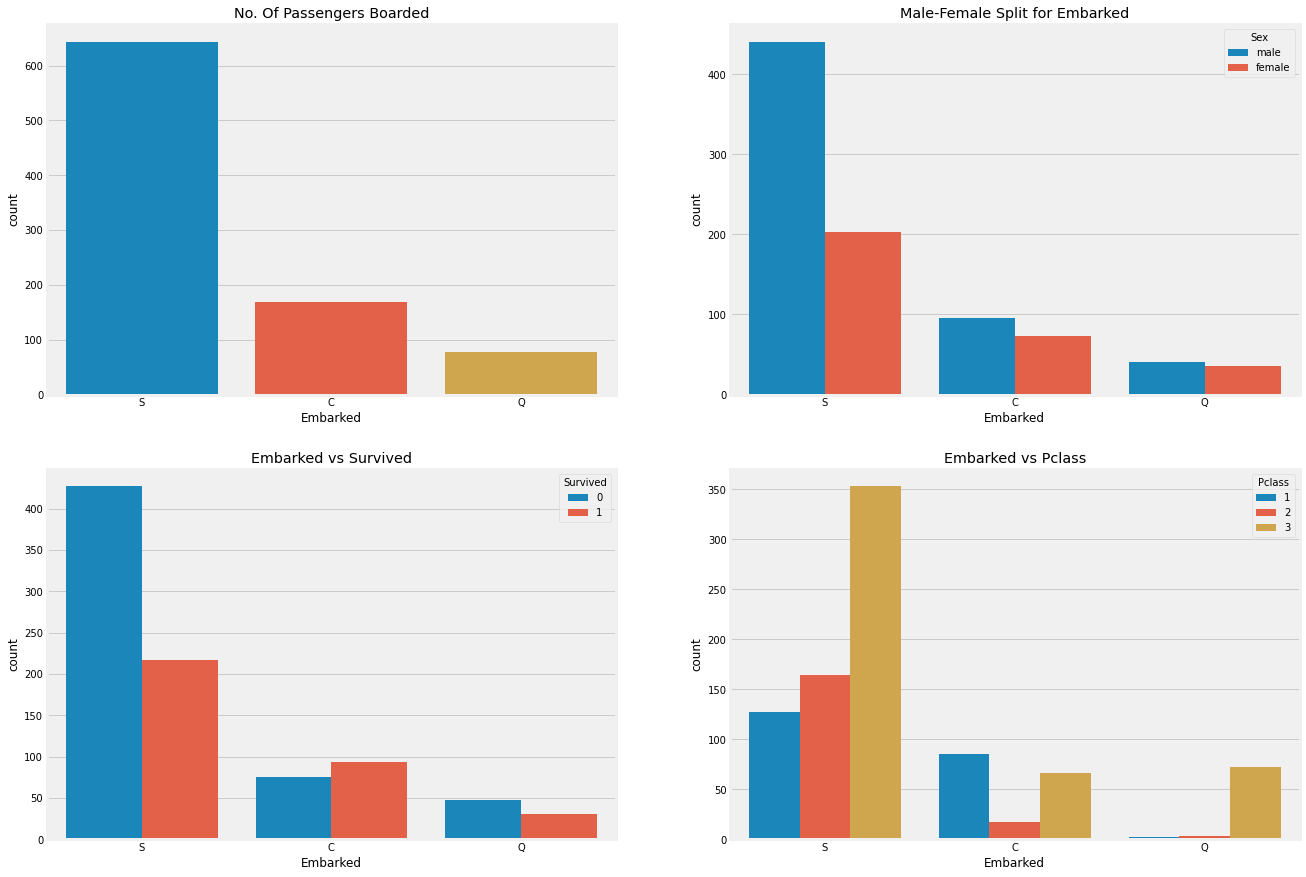

In [80]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue = 'Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue = 'Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

# plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**논평:**  
1) S 항구에서 가장 많은 승객이 탑승했습니다. 이 중 대다수는 Pclass3 입니다.  
2) C에서 온 승객들은 운이 좋아 보입니다. 생존률 중 좋은 비율을 차지하고 있기 때문입니다. 이러한 이유는 아마도 Pclass1과 Pclass2 승객들이 구조됐기 때문입니다.  
3) S 항구는 대다수의 부자들이 탑승한 것으로 보입니다. 반면 이 곳의 생존률은 낮았는데, 그 이유는 Pclass3의 거의 **81%**가 생존하지 못했기 때문입니다.  
4) Q 항구는 거의 95%의 승객이 Pclass3입니다.

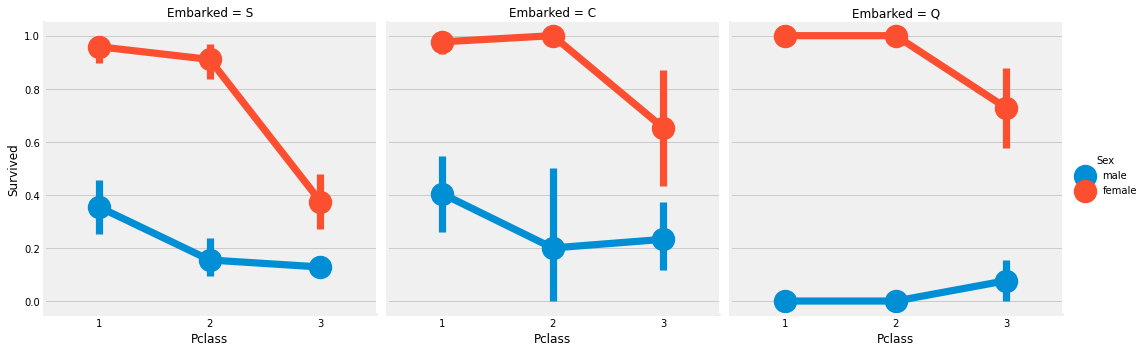

In [81]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

**논평:**  
1) 생존 확률은 거의 1입니다. Pclass1 과 Pclass2의 여자들의 경우. Embarked에 상관 없이.  
2) S항구의 Pclass3 승객은 운이 매우 좋지 않은 듯 합니다. 여자와 남자의 생존률이 매우 낮았기 때문입니다.  
3) Q 항구의 남자들은 매우 운이 안좋아 보입니다. 이들 중 대부분은 Pclass3입니다.

**Filling Embarked NaN**  
가장 많은 승객이 S 항구에서 탑승했기 때문에 S의 값으로 NaN 값을 대체하겠습니다.

In [84]:
data['Embarked'].head(5)

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [85]:
data['Embarked'].fillna('S', inplace=True)

In [86]:
data.Embarked.isnull().any()

False

Embarked 컬럼의 null 값이 모두 대체됐습니다.

### SibSp -> Discrete Feature
해당 피처는 어떤 사람이 혼자인지, 가족과 있는지를 나타냅니다.  
Sibling = 형제, 자매, 새형재, 새자매  
Spouse = 남편, 아내

In [87]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


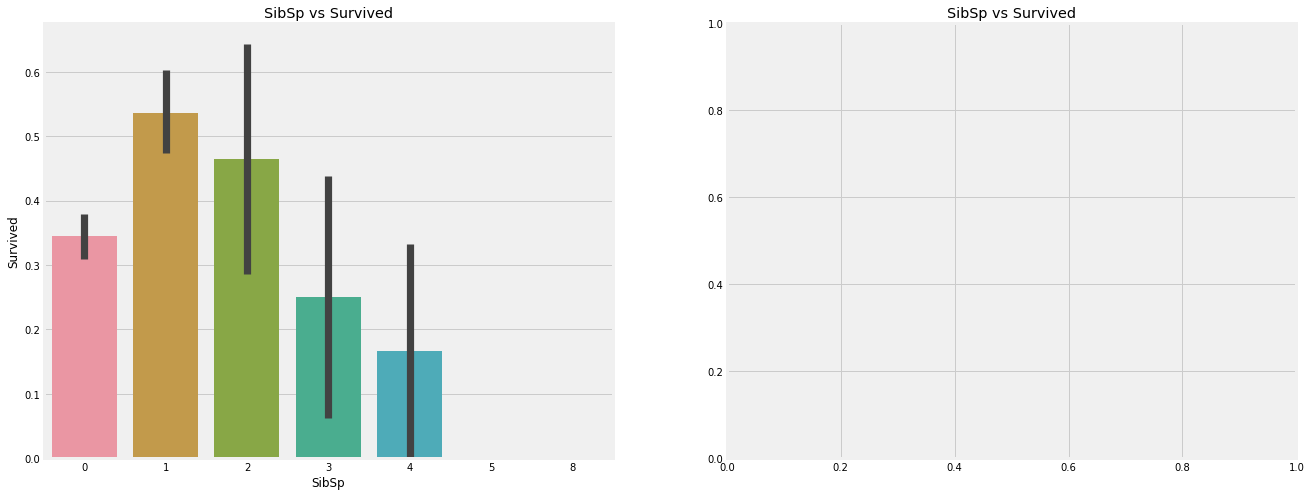

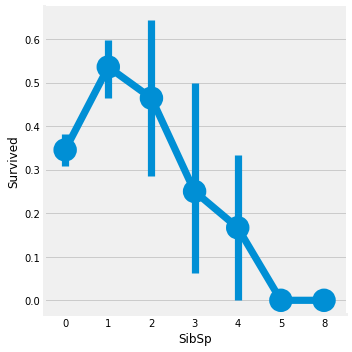

In [98]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
# plt.close(0)
plt.show()

In [99]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**논평:**  
barplot과 factorplot은 나타냅니다. 만약 승객이 혼자 탑승했다면 형제자매 없이 그는 34.5%로 생존할 것입니다. 그래프는 심하게 감소합니다. 형제자매의 수가 증가할 수록. 이는 말이 됩니다. 만약 내가 가족과 같이 탑승했다면 내가 먼저 사는 대신에 그들을 살리려고 노력했을 것입니다. 놀랍게도 5-8의 가족이 있는 경우 생존률은 0%입니다.  
이유는 Pclass 때문입니다. crosstab의 SibSp>3은 모두 Pclass3 이었습니다. Pclass의 모든 대가족(>3)이 사망할 것은 임박한 일이었습니다.

### Parch

In [100]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


크로스탭은 다시금 보여줍니다. 대가족은 Pclass3에서 탑승했다는 것을

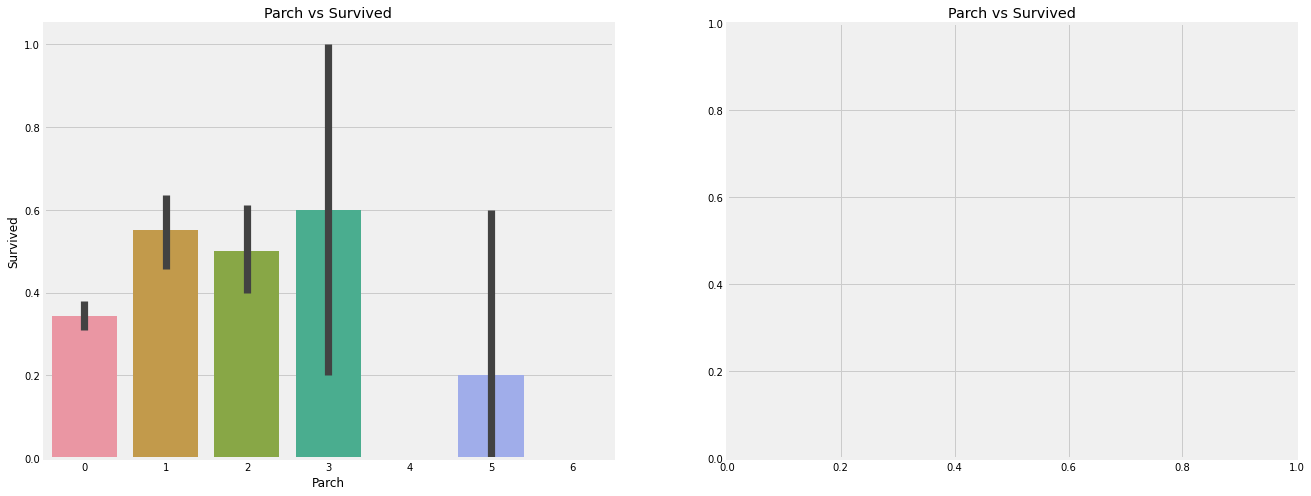

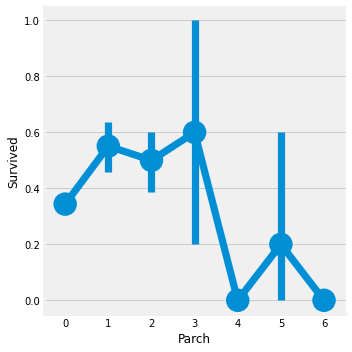

In [101]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.show()

**논평:**  
비슷한 결과가 나왔습니다. 부모님과 같이 탑승한 사람은 더욱 많은 생존률을 가집니다. 하지만 이는 구성원 수가 올라감에 따라 감소합니다.  
생존률은 1-3 명의 부모님을 가진 사람이 좋습니다. 혼자라는 것은 치명적이라는 것이 드러났으며 4명 이상의 부모가 배에 있는 사람은 생존률이 감소합니다.

### Fare -> Continous Feature

In [104]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


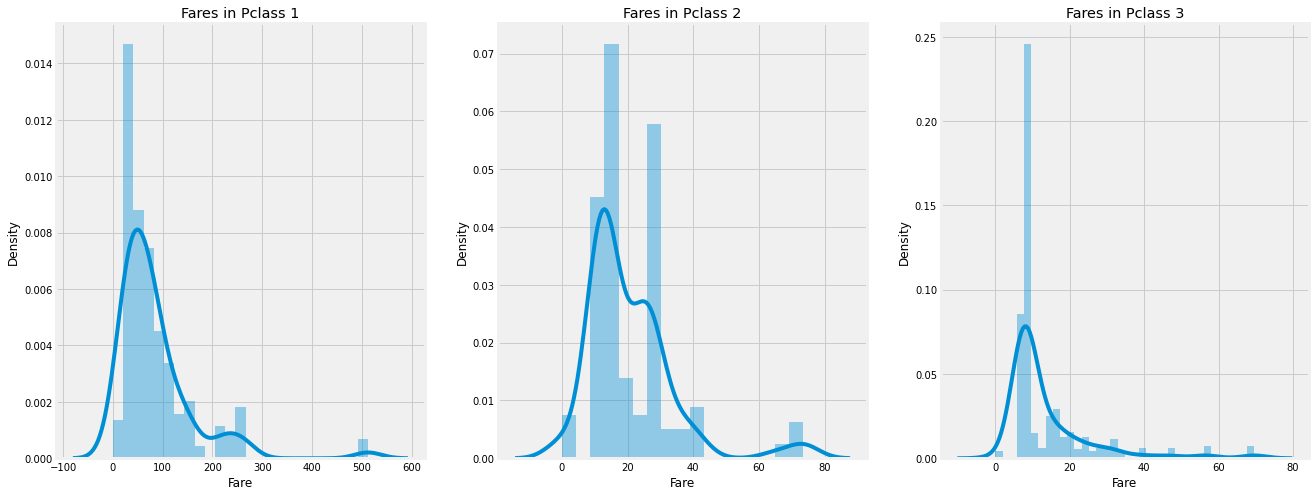

In [105]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

Pclass1에는 매우 큰 요금 분포가 있는 것 같습니다. 그리고 이는 표준이 감소함에 따라 감소합니다?  
이 또한 continous하기 때문에 binning을 이용해 이산값으로 전환할 수 있습니다.

### 모든 피처에 대한 중간 점검:  
**Sex:** 남성과 비교했을 때 여성의 생존률이 더 높았다.  
**Pclass:** 눈에 띄는 경향이 있습니다. 1st class의 승객은 생존률이 높았습니다. Pclass 3의 경우 생존률이 매우 낮았습니다. 여성의 경우 Pclass1의 생존률은 거의 1이었으며 Pclass2 또한 마찬가지로 높았습니다.  
**Age:** 5-10살 정도의 아이들은 생존률이 높았습니다. 15-35살 정도 되는 나이대의 승객들이 매우 많이 사망했습니다.  
**Embarked:** 매우 흥미로운 피처입니다. **C 항구의 생존 확률이 더욱 나은 것 같습니다. 대다수의 Pclass1 승객이 S에서 탔음에도.** Q 항구의 승객은 대부분 Pclass3 이었습니다.  
**Parch + SibSp:** 1-2명의 배우자나 형제자매, 혹은 1-3명의 부모님과 같이 탑승했다면 비교적 좋은 생존 확률을 갖습니다. 하지만 혼자라거나 대가족이라면 이보다 못합니다.

### Correlation Between The Features

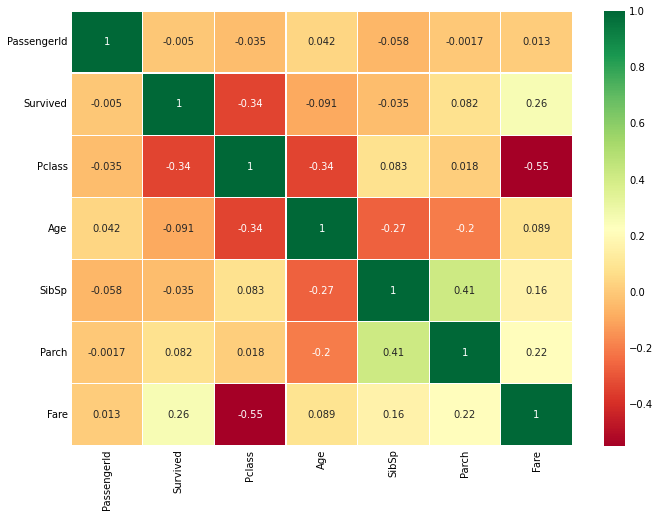

In [106]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) # data.corr() -> correlation matrix
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

**Heatmap에 대한 해석**  
첫 번째로 알아두어야 할 사실은 오직 숫자로 된 피처들만 비교된다는 것입니다. 우리는 상관관계를 비교할 수 없습니다. 알파벳과 숫자들 간에는. plot을 이해하기 전에 상관관계가 무엇인지 먼저 알아야 합니다.  
  
**양의 상관관계:** feature A의 증가가 feature B의 증가를 이끌어 낸다면 이들은 양의 상관관계를 가지고 있습니다. A가 1을 가지고 있다면 완벽한 양의 상관관계임을 의미합니다.  
  
**음의 상관관계:** feature B의 감소가 feature B의 감소를 이끌어 낸다면 이들은 음의 상관관계를 가지고 있습니다. A가 -1을 가지고 있다면 완벽한 음의 상관관계임을 의미합니다.

두 피처가 매우 높이, 혹은 완벽한 상관관계를 가지고 있다고 할 때 하나의 증가는 다른 하나의 증가를 가져옵니다. 이는 두 피처가 매우 비슷한 정보를 가지고 있음을 의미하며 정보에 있어 분산이 매우 적거나 없다는 것입니다. 이는 **다중공선성(MultiColinearity)**으로 알려져 있으며, 앞의 두 피처는 거의 같은 정보를 가지고 있습니다.  
  
두 정보가 중복되는 상황에서 두 가지를 다 사용해야 한다고 생각하나요? 모델을 만들거나 훈련시킬 때에는 중복되는 것들을 제거해야 훈련 시간을 감소시킬 수 있는 등 많은 이점이 있습니다.  
  
이제 위의 히트맵에서 피처들 간에 상관관계가 많지 않다는 것을 발겨할 수 있습니다. **가장 높은 상관관계는 SibSp, Parch에서 0.41입니다.** 따라서 우리는 모든 피처를 사용할 수 있습니다.

## Part2: Feature Engineering and Data Cleaning
Feature가 포함된 데이터 셋을 받았다고 했을 때 모든 피처가 중요할 필요는 없습니다. 아마 중복되는 피처들이 있을텐데 이들은 제거돼야 합니다. 또한 새로운 피처를 추가할 수도 있습니다. 서로 다른 피처로부터 정보를 관찰하거나 추출해서  
  
예를 들자면 Name Feature를 사용해 Initials 피처를 만드는 것입니다. 새로운 피처를 만들거나 제거해야될 지 살펴보도록 하겠습니다. 또한 연관된 피처들을 변화시켜서 Predictive Modeling에 적합하게 만들겠습니다.